# Python Lab Exercise #2

## Objectives:

- Load .csv files into `pandas` DataFrames
- Describe and manipulate data in Series and DataFrames
- Visualize data using DataFrame methods and `matplotlib`

![pandas](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/2880px-Pandas_logo.svg.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

## What is Pandas?

Pandas, as [the Anaconda docs](https://docs.anaconda.com/anaconda/packages/py3.7_osx-64/) tell us, offers us "High-performance, easy-to-use data structures and data analysis tools." It's something like "Excel for Python", but it's quite a bit more powerful.

Let's read in the heart dataset.

Pandas has many methods for reading different types of files. Note that here we have a db file for this exercise.

Read about this dataset [here](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data).

In [2]:
# loading the data from the database python.db
conn = sqlite3.connect("C:\\Users\\arnie\\Coding\\DS311AssigmentSubmission\\PythonLabexercise1\\data.db")

heart_df = pd.read_sql_query("SELECT * FROM heart", conn)

conn.close()

print(heart_df.head())


   id  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   0   63    1   3       145   233    1        0      150      0      2.3   
1   1   37    1   2       130   250    0        1      187      0      3.5   
2   2   41    0   1       130   204    0        0      172      0      1.4   
3   3   56    1   1       120   236    0        1      178      0      0.8   
4   4   57    0   0       120   354    0        1      163      1      0.6   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1  


The output of the `.to_sql()` function is a pandas *DataFrame*, which has a familiar tabaular structure of rows and columns.

In [3]:
type(heart_df)

pandas.core.frame.DataFrame

## DataFrames and Series

Two main types of pandas objects are the DataFrame and the Series, the latter being in effect a single column of the former:

In [4]:
age_series = heart_df['age']
type(age_series)

pandas.core.series.Series

Notice how we can isolate a column of our DataFrame simply by using square brackets together with the name of the column.

Both Series and DataFrames have an *index* as well:

In [5]:
heart_df.index

RangeIndex(start=0, stop=303, step=1)

In [6]:
age_series.index

RangeIndex(start=0, stop=303, step=1)

Pandas is built on top of NumPy, and we can always access the NumPy array underlying a DataFrame using `.values`.

In [7]:
heart_df.values

array([[  0.,  63.,   1., ...,   0.,   1.,   1.],
       [  1.,  37.,   1., ...,   0.,   2.,   1.],
       [  2.,  41.,   0., ...,   0.,   2.,   1.],
       ...,
       [300.,  68.,   1., ...,   2.,   3.,   0.],
       [301.,  57.,   1., ...,   1.,   3.,   0.],
       [302.,  57.,   0., ...,   1.,   2.,   0.]])

## Basic DataFrame Attributes and Methods

### `.head()`

In [8]:
# complete the python code here
print(heart_df.head())

   id  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   0   63    1   3       145   233    1        0      150      0      2.3   
1   1   37    1   2       130   250    0        1      187      0      3.5   
2   2   41    0   1       130   204    0        0      172      0      1.4   
3   3   56    1   1       120   236    0        1      178      0      0.8   
4   4   57    0   0       120   354    0        1      163      1      0.6   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1  


### `.tail()`

In [9]:
# complete the python code here
print(heart_df.tail())

      id  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298  298   57    0   0       140   241    0        1      123      1      0.2   
299  299   45    1   3       110   264    0        1      132      0      1.2   
300  300   68    1   0       144   193    1        1      141      0      3.4   
301  301   57    1   0       130   131    0        1      115      1      1.2   
302  302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  


### `.info()`

In [10]:
# complete the python code here
print(heart_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        303 non-null    int64  
 1   age       303 non-null    int64  
 2   sex       303 non-null    int64  
 3   cp        303 non-null    int64  
 4   trestbps  303 non-null    int64  
 5   chol      303 non-null    int64  
 6   fbs       303 non-null    int64  
 7   restecg   303 non-null    int64  
 8   thalach   303 non-null    int64  
 9   exang     303 non-null    int64  
 10  oldpeak   303 non-null    float64
 11  slope     303 non-null    int64  
 12  ca        303 non-null    int64  
 13  thal      303 non-null    int64  
 14  target    303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB
None


### `.describe()`

In [11]:
# complete the python code here
print(heart_df.describe())

               id         age         sex          cp    trestbps        chol  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean   151.000000   54.366337    0.683168    0.966997  131.623762  246.264026   
std     87.612784    9.082101    0.466011    1.032052   17.538143   51.830751   
min      0.000000   29.000000    0.000000    0.000000   94.000000  126.000000   
25%     75.500000   47.500000    0.000000    0.000000  120.000000  211.000000   
50%    151.000000   55.000000    1.000000    1.000000  130.000000  240.000000   
75%    226.500000   61.000000    1.000000    2.000000  140.000000  274.500000   
max    302.000000   77.000000    1.000000    3.000000  200.000000  564.000000   

              fbs     restecg     thalach       exang     oldpeak       slope  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.148515    0.528053  149.646865    0.326733    1.039604    1.399340   
std      0.356198    0.5258

### `.dtypes`

In [12]:
# complete the python code here
print(heart_df.dtypes)

id            int64
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


### `.shape`

In [13]:
# complete the python code here
print(heart_df.shape)

(303, 15)


### Exploratory Plots

Let's make ourselves a histogram of ages:

C:\Users\arnie\AppData\Local\Temp\ipykernel_20448\219183722.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=heart_df['age']);


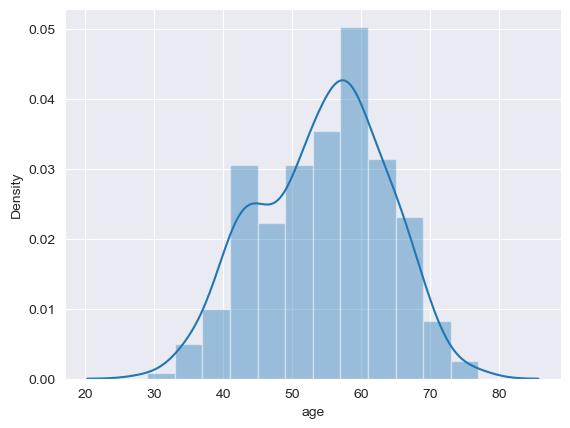

In [14]:
sns.set_style('darkgrid')
sns.distplot(a=heart_df['age']);

# For more recent versions of seaborn:
# sns.histplot(data=heart_df['age'], kde=True);

And while we're at it let's do a scatter plot of maximum heart rate vs. age:

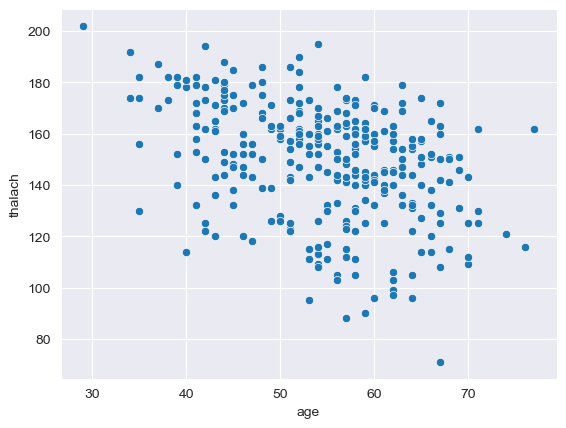

In [15]:
sns.scatterplot(x=heart_df['age'], y=heart_df['thalach']);

## Adding to a DataFrame

### Adding Rows

Here are two rows that our engineer accidentally left out of the .csv file, expressed as a Python dictionary:

In [16]:
extra_rows = {'age': [40, 30], 
              'sex': [1, 0], 
              'cp': [0, 0], 
              'trestbps': [120, 130],
              'chol': [240, 200],
              'fbs': [0, 0], 
              'restecg': [1, 0], 
              'thalach': [120, 122], 
              'exang': [0, 1],
              'oldpeak': [0.1, 1.0], 
              'slope': [1, 1], 
              'ca': [0, 1], 
              'thal': [2, 3],
              'target': [0, 0]}
extra_rows

{'age': [40, 30],
 'sex': [1, 0],
 'cp': [0, 0],
 'trestbps': [120, 130],
 'chol': [240, 200],
 'fbs': [0, 0],
 'restecg': [1, 0],
 'thalach': [120, 122],
 'exang': [0, 1],
 'oldpeak': [0.1, 1.0],
 'slope': [1, 1],
 'ca': [0, 1],
 'thal': [2, 3],
 'target': [0, 0]}

How can we add this to the bottom of our dataset?

In [17]:
# Let's first turn this into a DataFrame.
# We can use the .from_dict() method.

missing = pd.DataFrame(extra_rows)
missing

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40,1,0,120,240,0,1,120,0,0.1,1,0,2,0
1,30,0,0,130,200,0,0,122,1,1.0,1,1,3,0


In [23]:
# Now we just need to concatenate the two DataFrames together.
# Note the `ignore_index` parameter! We'll set that to True.
# complete the python code here
combined_df = pd.concat([heart_df, missing], ignore_index=True)





In [22]:
# Let's check the end to make sure we were successful!
# complete the python code here
print(combined_df.head())
print(f"\nTotal rows after combining: {len(combined_df)}")


    id  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  0.0   63    1   3       145   233    1        0      150      0      2.3   
1  1.0   37    1   2       130   250    0        1      187      0      3.5   
2  2.0   41    0   1       130   204    0        0      172      0      1.4   
3  3.0   56    1   1       120   236    0        1      178      0      0.8   
4  4.0   57    0   0       120   354    0        1      163      1      0.6   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1  

Total rows after combining: 305


### Adding Columns

Adding a column is very easy in `pandas`. Let's add a new column to our dataset called "test", and set all of its values to 0.

In [26]:
heart_augmented = heart_df.copy()
heart_augmented['test'] = 0

In [27]:
heart_augmented.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


I can also add columns whose values are functions of existing columns.

Suppose I want to add the cholesterol column ("chol") to the resting systolic blood pressure column ("trestbps"):

In [28]:
# complete the python code here
heart_df["chol_plus_bp"] = heart_df["chol"] + heart_df["trestbps"]



In [29]:
heart_augmented.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


## Filtering

We can use filtering techniques to see only certain rows of our data. If we wanted to see only the rows for patients 70 years of age or older, we can simply type:

In [30]:
heart_augmented['age'] >= 70

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Name: age, Length: 303, dtype: bool

In [31]:
heart_augmented[heart_augmented['age'] >= 70]

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test
25,25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1,0
60,60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,0
129,129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1,0
144,144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1,0
145,145,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1,0
151,151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1,0
225,225,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0
234,234,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0,0
238,238,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0,0
240,240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0,0


Use '&' for "and" and '|' for "or".

### Exercise

Display the patients who are 70 or over as well as the patients whose trestbps score is greater than 170.

In [32]:
# complete the python code here

filtered_patients = heart_df[(heart_df["age"] >= 70) | (heart_df["trestbps"] > 170)]
print(filtered_patients)

      id  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
8      8   52    1   2       172   199    1        1      162      0      0.5   
25    25   71    0   1       160   302    0        1      162      0      0.4   
60    60   71    0   2       110   265    1        0      130      0      0.0   
101  101   59    1   3       178   270    0        0      145      0      4.2   
110  110   64    0   0       180   325    0        1      154      1      0.0   
129  129   74    0   1       120   269    0        0      121      1      0.2   
144  144   76    0   2       140   197    0        2      116      0      1.1   
145  145   70    1   1       156   245    0        0      143      0      0.0   
151  151   71    0   0       112   149    0        1      125      0      1.6   
203  203   68    1   2       180   274    1        0      150      1      1.6   
223  223   56    0   0       200   288    1        0      133      1      4.0   
225  225   70    1   0      

### Exploratory Plot

Using the subframe we just made, let's make a scatter plot of their cholesterol levels vs. age and color by sex:

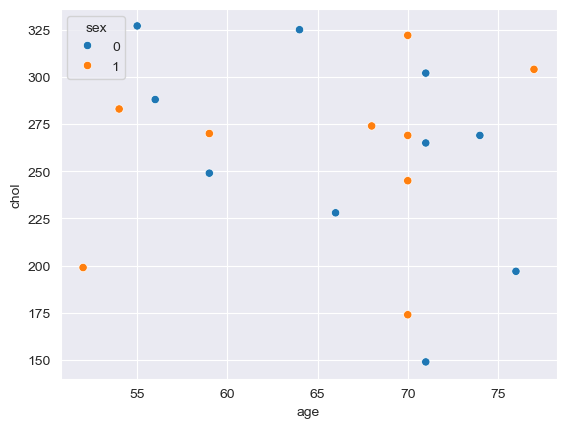

In [33]:
# complete the python code here
at_risk = heart_df[(heart_df["age"] >= 70) | (heart_df["trestbps"] > 170)]

sns.scatterplot(data=at_risk, x='age', y='chol', hue='sex');

### `.loc` and `.iloc`

We can use `.loc` to get, say, the first ten values of the age and resting blood pressure ("trestbps") columns:

In [34]:
heart_augmented.loc

In [35]:
heart_augmented.loc[:9, ['age', 'trestbps']]

,age,trestbps
0,63,145
1,37,130
2,41,130
3,56,120
4,57,120
5,57,140
6,56,140
7,44,120
8,52,172
9,57,150


`.iloc` is used for selecting locations in the DataFrame **by number**:

In [36]:
heart_augmented.iloc

In [37]:
heart_augmented.iloc[3, 0]

3

In [38]:
heart_augmented.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


### Exercise

How would we get the same slice as just above by using .iloc() instead of .loc()?

In [40]:
# complete the python code here
heart_df.loc[heart_df["age"] >= 70]


,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_plus_bp
25,25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1,462
60,60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,375
129,129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1,389
144,144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1,337
145,145,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1,401
151,151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1,261
225,225,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,319
234,234,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0,452
238,238,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0,429
240,240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0,429


## Statistics

### `.mean()`

In [41]:
# complete the python code here
heart_df.mean()


id              151.000000
age              54.366337
sex               0.683168
cp                0.966997
trestbps        131.623762
chol            246.264026
fbs               0.148515
restecg           0.528053
thalach         149.646865
exang             0.326733
oldpeak           1.039604
slope             1.399340
ca                0.729373
thal              2.313531
target            0.544554
chol_plus_bp    377.887789
dtype: float64

Be careful! Some of these will are not straightforwardly interpretable. What does an average "sex" of 0.682 mean?

### `.min()`

In [42]:
# complete the python code here
heart_df.min()


id                0.0
age              29.0
sex               0.0
cp                0.0
trestbps         94.0
chol            126.0
fbs               0.0
restecg           0.0
thalach          71.0
exang             0.0
oldpeak           0.0
slope             0.0
ca                0.0
thal              0.0
target            0.0
chol_plus_bp    249.0
dtype: float64

### `.max()`

In [43]:
# complete the python code here
heart_df.max()


id              302.0
age              77.0
sex               1.0
cp                3.0
trestbps        200.0
chol            564.0
fbs               1.0
restecg           2.0
thalach         202.0
exang             1.0
oldpeak           6.2
slope             2.0
ca                4.0
thal              3.0
target            1.0
chol_plus_bp    679.0
dtype: float64

## Series Methods

### `.value_counts()`

How many different values does slope have? What about sex? And target?

In [44]:
heart_augmented['slope'].value_counts()

slope
2    142
1    140
0     21
Name: count, dtype: int64

In [45]:
heart_augmented['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

### `.sort_values()`

In [46]:
heart_augmented['age'].sort_values()

72     29
58     34
125    34
239    35
65     35
       ..
60     71
151    71
129    74
144    76
238    77
Name: age, Length: 303, dtype: int64

## `pandas`-Native Plotting

The `.plot()` and `.hist()` methods available for DataFrames use a wrapper around `matplotlib`:

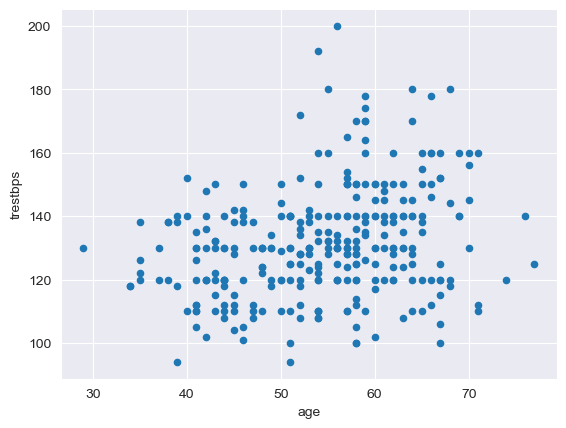

In [47]:
heart_augmented.plot(x='age', y='trestbps', kind='scatter');

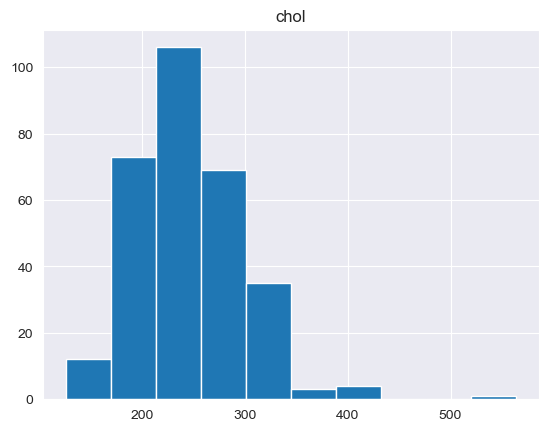

In [48]:
heart_augmented.hist(column='chol');

### Exercises

1. Make a bar plot of "age" vs. "slope" for the `heart_augmented` DataFrame.

C:\Users\arnie\AppData\Local\Temp\ipykernel_20448\2724178094.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_slope_by_age, x="age", y="slope", palette="viridis")


<Axes: xlabel='age', ylabel='slope'>

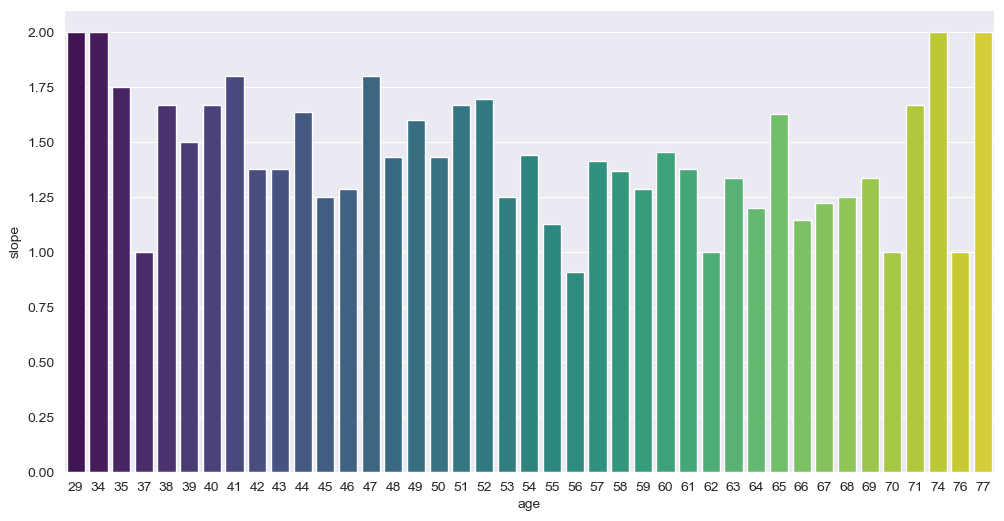

In [49]:
# complete the python code here
avg_slope_by_age = heart_augmented.groupby("age")["slope"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_slope_by_age, x="age", y="slope", palette="viridis")


2. Make a histogram of ages for **just the men** in `heart_augmented` (heart_augmented['sex']=1).

<Axes: xlabel='age', ylabel='Count'>

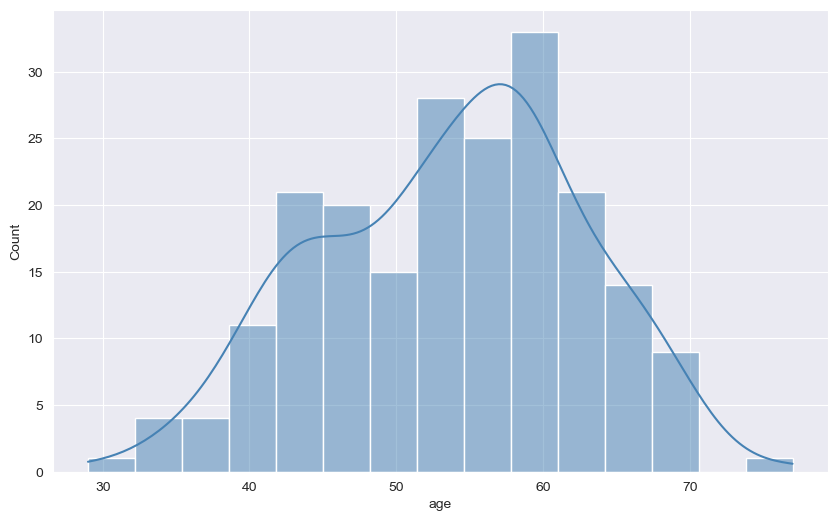

In [50]:
# complete the python code here
men_only = heart_augmented[heart_augmented["sex"] == 1]

plt.figure(figsize=(10, 6))
sns.histplot(data=men_only, x="age", bins=15, kde=True, color="steelblue")


3. Make separate scatter plots of cholesterol vs. resting systolic blood pressure for the target=0 and the target=1 groups. Put both plots on the same figure and give each an appropriate title.

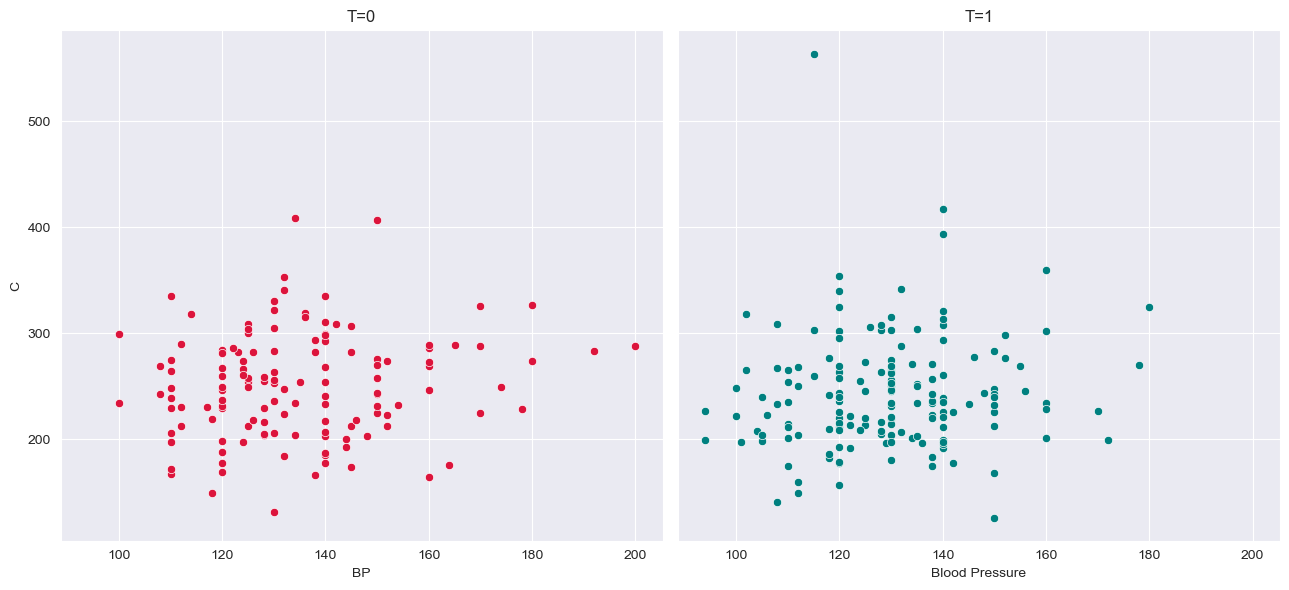

In [52]:
# complete the python code here
f, a = plt.subplots(1, 2, figsize=(13, 6), sharex=True, sharey=True)

d0 = heart_augmented[heart_augmented["target"] == 0]
d1 = heart_augmented[heart_augmented["target"] == 1]

sns.scatterplot(x="trestbps", y="chol", data=d0, ax=a[0], color="crimson")
a[0].set(xlabel="BP", ylabel="C", title="T=0")

sns.scatterplot(y="chol", x="trestbps", data=d1, ax=a[1], color="teal")
a[1].set_title("T=1")
a[1].set_ylabel("Cholesterol")
a[1].set_xlabel("Blood Pressure")

plt.tight_layout()
plt.show()
